In [1]:
# Dimension reduction using PCA
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Writing the data
# This data was from a homework, therefore I had to enter it completely
Xd = np.array([[0,1,1,1],[1,1,1,1],[1,1,-0,1],[0,1,0,1],
             [0,3,1,2],[0,3,0,2],[2,2,0,2],[2,0,0,2]])
# Since PCA is unsupervised, we dont need the labels
X=Xd[:,:3]
y = Xd[:,3]

In [14]:
# Finding the sample means
mean_vec = np.mean(X, axis=0)

# Subtracting sample means from the data
X = X - mean_vec

# Computing the scatter matrix and printing it
scatter_mat = (X).T.dot(X)
print('Scatter matrix \n%s' %scatter_mat)
print('Mean vector \n%s' %mean_vec)

Scatter matrix 
[[ 5.5   -3.    -1.25 ]
 [-3.     8.     0.5  ]
 [-1.25   0.5    1.875]]
Mean vector 
[0.75  1.5   0.375]


In [4]:
# Performing an eigendecomposition on the scatter matrix and printing its eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(scatter_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.56242342  0.74691448  0.35468106]
 [ 0.81587782  0.57095722  0.09138513]
 [ 0.13425084 -0.34077355  0.93051067]]

Eigenvalues 
[10.15031667  3.77703874  1.44764459]


In [5]:
# Making a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sorting the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirming that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
10.150316670962765
3.777038735609574
1.4476445934276696


In [6]:
# Expressing the “explained variance” as percentage
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 66.02%
eigenvalue 2: 24.57%
eigenvalue 3: 9.42%


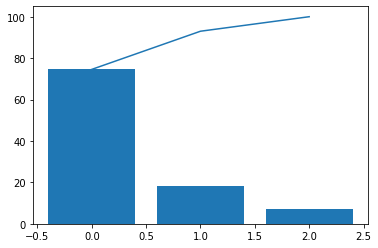

In [7]:
# Calculating the explained variance from the calculated eigenvalues to show how much information (variance)
# can be attributed to each of the principal components
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
x =  np.arange(3)

fig, ax = plt.subplots()
plt.bar(x, var_exp)
plt.plot(x, cum_var_exp)
plt.show()

In [7]:
# Constructing the projection matrix to transform the data and project it on 2D
matrix_w2d = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n', matrix_w2d)

Matrix W:
 [[-0.56242342  0.74691448]
 [ 0.81587782  0.57095722]
 [ 0.13425084 -0.34077355]]


In [8]:
# Constructing the projection matrix to transform the data and project it on 1D
matrix_w1d = eig_pairs[0][1].reshape(3,1)

print('Matrix W:\n', matrix_w1d)

Matrix W:
 [[-0.56242342]
 [ 0.81587782]
 [ 0.13425084]]


In [9]:
# Projection on 2D feature space
X2d = ((matrix_w2d).T.dot(X.T)).T
# Projection on 1D feature space
X1d = ((matrix_w1d).T.dot(X.T)).T

In [15]:
print(X2d)

[[ 0.09778543 -1.05864794]
 [-0.46463799 -0.31173346]
 [-0.59888883  0.02904009]
 [-0.03646541 -0.71787439]
 [ 1.72954106  0.0832665 ]
 [ 1.59529023  0.42404005]
 [-0.34543443  1.34691179]
 [-1.97719006  0.20499735]]


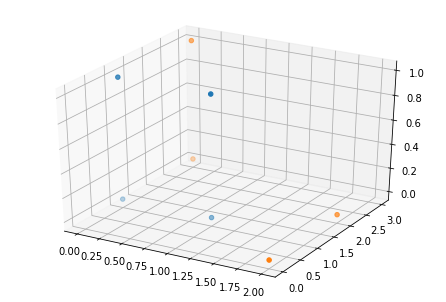

In [13]:
# Visualizing the initial data in 3D space
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter (X[y==1,0],X[y==1,1],X[y==1,2])
ax.scatter (X[y==2,0],X[y==2,1],X[y==2,2])
plt.show()

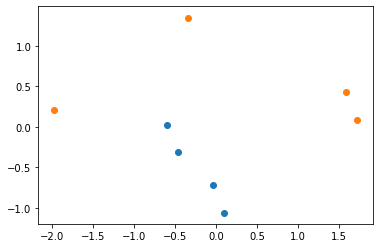

In [16]:
# Visualizing the projected data on 2D space
fig = plt.figure()
plt.scatter (X2d[y==1,0],X2d[y==1,1])
plt.scatter (X2d[y==2,0],X2d[y==2,1])
plt.show()

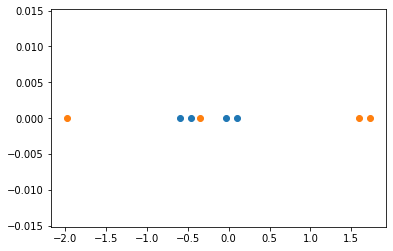

In [17]:
# Visualizing the projected data on 1D space
y1 = np.zeros(10)
fig = plt.figure()
plt.scatter (X1d[y==1,0],y1[0:4])
plt.scatter (X1d[y==2,0],y1[0:4])
plt.show()